/tmp/ipykernel_1966664/831442777.py:16: DtypeWarning: Columns (6,7,10,11,12,13,14,15,16,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


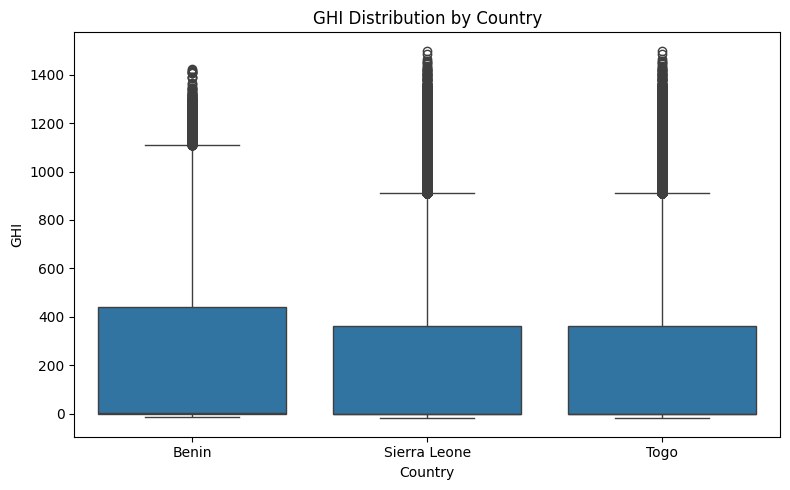

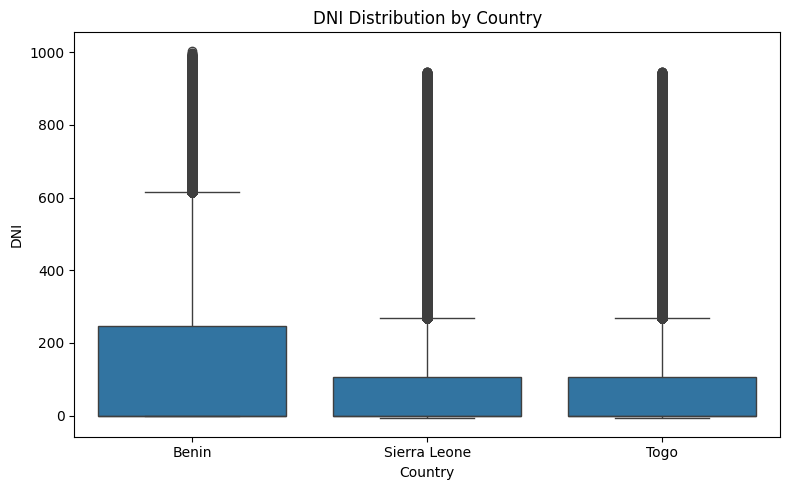

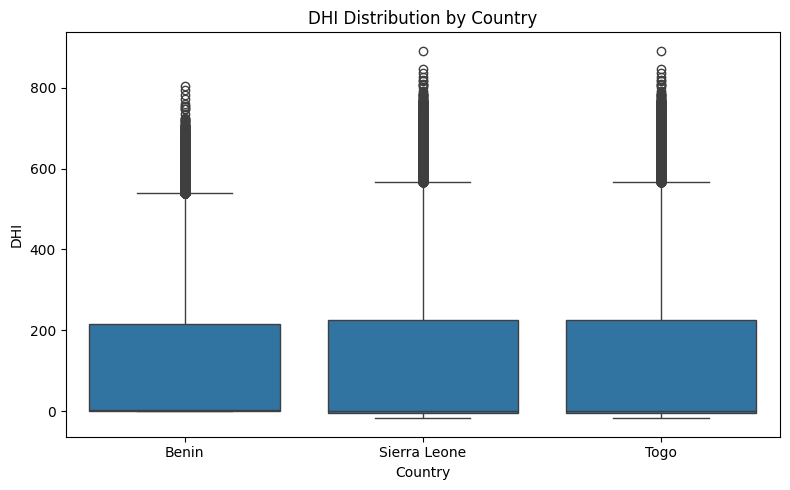

Summary Statistics (mean, median, std):
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         230.554605    2.1  322.532194  151.258181    0.0  250.956810   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          201.957515    0.3  298.495150  116.376337   -0.1  218.652659   

                     DHI                     
                    mean median         std  
Country                                      
Benin         116.444136    2.5  156.520644  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          113.720571   -0.1  158.946032  

Statistical Testing on GHI Across Countries:
One-way ANOVA: F-statistic = 1523.0107, p-value = 0.0000e+00
Kruskal-Wallis: H-statistic = 4780.1350, p-value = 0.0000e+00


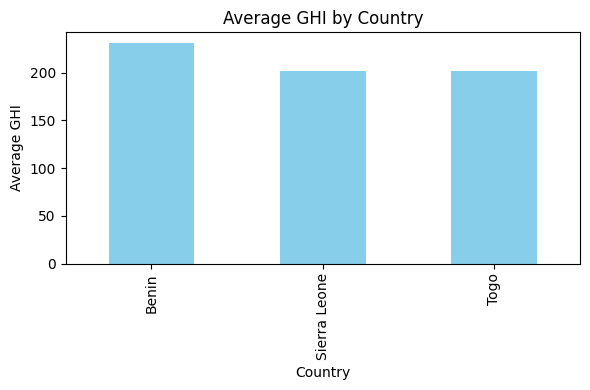

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, kruskal

# File paths
files = {
    "Benin": "../data/benin_clean.csv",
    "Sierra Leone": "../data/sierraleone_clean.csv",
    "Togo": "../data/togo_clean.csv",
}

# Load and label each dataset
df_list = []
for country, path in files.items():
    df = pd.read_csv(path)
    df["Country"] = country
    df_list.append(df)

# Combine into one DataFrame
df_all = pd.concat(df_list, ignore_index=True)

# ========== METRIC COMPARISON ==========
metrics = ["GHI", "DNI", "DHI"]

# Boxplots
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df_all, x="Country", y=metric)
    plt.title(f"{metric} Distribution by Country")
    plt.tight_layout()
    plt.show()

# ========== SUMMARY TABLE ==========
summary = df_all.groupby("Country")[metrics].agg(["mean", "median", "std"])
print("Summary Statistics (mean, median, std):")
print(summary)

# ========== STATISTICAL TESTING ==========
# Use ANOVA or Kruskal-Wallis (non-parametric)
print("\nStatistical Testing on GHI Across Countries:")
ghi_values = [df_all[df_all["Country"] == country]["GHI"] for country in files.keys()]

# One-way ANOVA
f_stat, p_val_anova = f_oneway(*ghi_values)
print(f"One-way ANOVA: F-statistic = {f_stat:.4f}, p-value = {p_val_anova:.4e}")

# Kruskal–Wallis Test (alternative)
h_stat, p_val_kruskal = kruskal(*ghi_values)
print(f"Kruskal-Wallis: H-statistic = {h_stat:.4f}, p-value = {p_val_kruskal:.4e}")

# ========== VISUAL SUMMARY: Bar Chart ==========
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
avg_ghi.plot(kind="bar", color="skyblue")
plt.ylabel("Average GHI")
plt.title("Average GHI by Country")
plt.tight_layout()
plt.show()

Key Observations

- Country Benin has the highest median GHI, indicating strong solar potential.
- Country Togo shows the greatest variability in DNI, suggesting less stable solar conditions.
- Country Sierraleon and Togo has the lowest mean DHI, which might affect certain solar technologies.